# One planet model

This notebook follows the article http://exoplanets.astro.yale.edu/workshop/EPRV/Bibliography_files/Radial_Velocity.pdf 

The total energy associated with a system composed with a star and a planet is the sum of its kinectic energy plus their potential mutial atraction, i.e., 

\begin{equation}
\mathcal{E} = \frac{\dot{\vec{r_S}}^2 M_S}{2}+\frac{\dot{\vec{r_p}}^2 M_p}{2}-G \frac{ M_S M_p}{||\vec{R}||
},
\end{equation}

where $\dot{\vec{r}}$, $M$ and $\vec{R}$ represent a velocity, a mass and the distance between the star and planet, respectivelly. The subscript $S$ is related to the star and $p$ with the planet. This equation can be rewritten in terms of the position of the center of mass $\vec{r}_{CM}$ and the distance betweet the objects $\vec{R}$.

\begin{align}
    \vec{r}_{CM} &= \frac{M_S \vec{r}_S + M_p \vec{r}_p}{M_S+M_p} \\
    \vec{R} &= \vec{r}_S - \vec{r}_p \\
    \vec{r}_S &= \vec{r}_{CM} + \frac{M_p}{M_p+M_S}\vec{R} \\
    M_S \dot{\vec{r}_S}^2 + M_p \dot{\vec{r}_p}^2 &= (M_p+M_S) \dot{\vec{r}_{CM}}^2 + \frac{M_p M_S}{M_p+M_S} \dot{\vec{R}}^2
\end{align}

As there is no potential that depends on the center of mass, it is constant. So we can ignore the center of mass term by setting the oringin in the center of mass, i.e., 

\begin{equation}
    \mathcal{E} = \frac{M_p M_S}{2(M_p+M_S)} \dot{\vec{R}}^2-G \frac{ M_S M_p}{||\vec{R}||}
\end{equation}

using that $\dot{\vec{R}}^2 = \dot{R}^2 + R^2 \dot{\theta}^2$ and that using the Lagrange equations for $\theta$ gives that $ \dot{\theta} R^2 = L$ is constant 

\begin{equation}
    \mathcal{E} = \frac{M_p M_S}{2(M_p+M_S)}\left(\frac{d R}{d \theta}\right)^2 \frac{L^2}{R^4} + \frac{M_p M_S}{2(M_p+M_S)} \frac{L^2}{R^2} - G \frac{ M_S M_p}{R}
\end{equation}

whose solution is, for bounding energies,

\begin{equation}
r_s = \frac{M_p}{M_p+M_S} \frac{R_{max}R_{min}}{\frac{R_{max}+R_{min}}{2}+\frac{R_{max}-R_{min}}{2} \cos(\theta)},
\end{equation}

where $R_{min}$ is the minumil distance between the star and the planet e $R_{max}$ the maximum distance. The variable $\theta$ is the angle between the position in the minimal distance configuration to the actual configuration. This equation can be represented in terms of the ellipse parameters eccentricity ($e$) and semi-major axis ($a$)

\begin{equation}
    r_s = \frac{M_p}{M_p+M_S} \frac{a(1-e^2)}{1+e\cos(\theta)}
\end{equation}

The actual position of the star is given by the the vector, in respect to the center of mass reference frame,

\begin{equation}
     \vec{r}_S = \begin{pmatrix}r_s \cos(\theta)\\r_s \sin(\theta)\\0\end{pmatrix} .
\end{equation}

Its velocity is the derivation of the vector, i.e.,

\begin{equation}
    \dot{\vec{r}}_S = 
\sqrt{\frac{G M_p^2}{M_p+M_s}\frac{1}{a(1-e^2)}}
\begin{pmatrix}
-\sin(\theta)\\ 
\cos(\theta)+e\\ 
0
\end{pmatrix}
\end{equation}

From Earth, we observe the star in the line of sight direction $\vec{k}$

\begin{equation}
\vec{k} = \begin{pmatrix}
\sin(i)\cos(w)\\ 
\sin(i)\sin(w)\\ 
\cos(w)
\end{pmatrix}
\end{equation}

So the velocity observed is 

\begin{equation}
    v_r = K \left(\cos(w)\cos(\theta)-\sin(w)\sin(\theta)+e\cos(w)\right),
\end{equation}

where $K$ is the radial velocity amplitude.

The result above gives the star radial velocity (velocity in Earth line of sight), given by the angle $\theta$. But the measurements are given in respect to time. One way to describe the $\theta$ time dependence is to use the relation between the *mean anomally* $M$, *eccentrincity anomally* $E$ and $\theta$, a.k.a, *real anomally*.

The mean anomally is the angle $M$ by a circular orbit with the same period of the elliptical orbit:

\begin{equation}
    M = M_0 + \frac{2\pi}{\tau}(t-t_0),
\end{equation}
where $\tau$ is the planet period around the star, and $M_0$ is the mean anomally in time $t_0$.

The eccentryc anomaly and real anomaly have a direct relation given by
\begin{align*}
    \cos(\theta) &= \frac{\cos(E)-e}{1 - e \cos(E)}\\
    \sin(\theta) &= \frac{\sqrt{1-e^2} \sin(E)}{1 - e \cos(E)}
\end{align*}

and the relation between the eccentryc anomaly and the mean anomaly is given by the transcendental Kleper Equation

\begin{equation}
    M = E - e\sin(E)
\end{equation}

In the follow the velocity in terms of time is derived using the anomalies quantities. The kepler equation is solved para a quadratic newton solver.

In [72]:
#Animation based on http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [173]:
def elipse(th):
    return 0.5 * 8 /(3+0.9*np.cos(th))

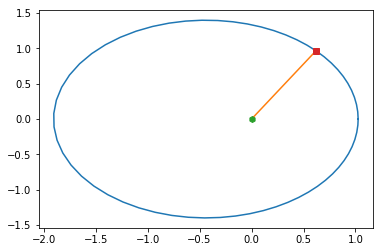

In [174]:
theta =  np.append(np.arange(0,2 * np.pi, 0.1),[0])
rs = elipse(theta)

x = rs*np.cos(theta)
y = rs*np.sin(theta)

fig, ax = plt.subplots()
ax.plot(x,y)
ax.plot([0,x[10]],[0,y[10]])
ax.plot(0,0,'h')
ax.plot(x[10],y[10],'s')

#line, = ax.plot([], [], lw=2)

#ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

In [75]:
from scipy.optimize import newton as nt
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML


In [99]:
#Returns the mean anomaly in the 2 pi interval
def mean_anomaly(M0,t,t0,tau):
    return (2 * np.pi * (t-t0) / tau + M0 ) % (2*np.pi)

#Returns the [cos(f),sin(f)], where f is the true anomaly.
def real_anomaly(M,e):
    ec_anol = M+nt(lambda x: e * np.sin(M+x)-x,0,lambda y: e * np.cos(M+y)-1)
    return [(np.cos(ec_anol)-e)/(1-e * np.cos(ec_anol)),(np.sqrt(1-e**2) * np.sin(ec_anol))/(1-e*np.cos(ec_anol))]

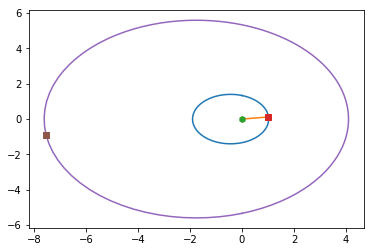

In [180]:
time = np.arange(0,10.1,0.1)
ma = mean_anomaly(0,time,0,10)
var = np.array(list(map(lambda x: real_anomaly(x,0.1),ma)))
theta = np.arctan2(var[:,0],var[:,1])
#theta =  np.append(np.arange(0,2 * np.pi, 0.1),[0])
rs = elipse(theta)
rs2 = 4*elipse(theta+np.pi)

x = rs*np.cos(theta)
y = rs*np.sin(theta)

x2 = rs2*np.cos(theta+np.pi)
y2 = rs2*np.sin(theta+np.pi)

fig, ax = plt.subplots()
ax.plot(x,y)
ax.plot([0,x[20]],[0,y[20]])
ax.plot(0,0,'h')
ax.plot(x[20],y[20],'s')
ax.plot(x2,y2)
ax.plot(x2[20],y2[20],'s')

#line, = ax.plot([], [], lw=2)

#ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

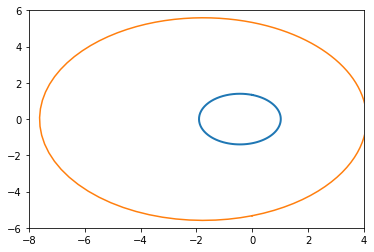

In [191]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( -8, 4))
ax.set_ylim((-6, 6))

ax.plot(x, y, lw=2)
ax.plot(x2, y2)
line2, = ax.plot([],[], 'd')
line3, = ax.plot([],[], 'd')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    return (line, line2,line3,)

# animation function. This is called sequentially
def animate(i,x,y):
    line2.set_data(x[i],y[i])
    line3.set_data(x2[i],y2[i])
    return (line,line2,line3,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,fargs=(x,y),frames=101, interval=50, blit=True)

In [192]:
HTML(anim.to_html5_video())